<a href="https://colab.research.google.com/github/lucapqg/Machine-learning/blob/main/aquecimento_global.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Aquecimento global</h1>**


---
 


# **Recursos**

In [ ]:
!pip install meteostat statsmodels optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 32.4 MB/s 
     |████████████████████████████████| 81 kB 10.0 MB/s 
     |████████████████████████████████| 209 kB 79.1 MB/s 
     |████████████████████████████████| 78 kB 8.9 MB/s 
     |████████████████████████████████| 112 kB 65.0 MB/s 
     |████████████████████████████████| 49 kB 7.7 MB/s 
     |████████████████████████████████| 147 kB 62.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=7f7c774fc63c2bff8262bdf56bd43271167e1aedd57867870cae9d83af2f4e13
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
#===============================================================================================#
from meteostat import Point, Daily,Hourly,Normals,Stations,Monthly
#===============================================================================================#
from datetime import datetime,date
import calendar
#===============================================================================================#
import pandas as pd
import numpy as np
#===============================================================================================#
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.formula.api import ols
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#===============================================================================================#
from scipy import stats
from scipy.stats import f_oneway
#===============================================================================================#
import matplotlib.dates as mdates      
import matplotlib.pyplot as plt    
from matplotlib import cm    
import seaborn as sns
%matplotlib inline
cm = sns.light_palette("green", as_cmap=True)
plt.style.use('ggplot')
#===============================================================================================#
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
#===============================================================================================#
from itertools import product
#===============================================================================================#
import warnings
warnings.filterwarnings("ignore")
#===============================================================================================#

In [ ]:
colors = ['#2ACB3B','#2A90CB','#F39C12','#CEC924','#CF2131']

# **Bases de dados**


---



>>**BASES**

**meteostat** - Base de dados meteorológicos e climáticos fornecendo dados meteorológicos detalhados para milhares de estações meteorológicas e locais em todo o mundo;

**NASA** - Administração Nacional da Aeronáutica e Espaço;

**NOAA** - Administração Oceânica e Atmosférica Nacional;

---
>>**DICIONARIO DE DADOS**

average	- média;

trend	- tendencia;

date - data;

temperature - temperatura °C;

year - ano;

land_surface_air_temp	 - temperatura do ar na superficie da terra °C;

lowess_smoothing_air	-  regressão polinomial local;

sea_surface_water_temp	 -  temperatura da superficie da água em °C;

lowess_smoothing_sea -   regressão polinomial local;

tavg	-  temperatura média do ar em °C diádia;

tmin	- temperatura mínima do ar em °C diaria;

tmax	- temperatura máxima do ar em °C diária;

prcp	- total diário de precipitação em mm;

snow	- profundidade máxima da neve em mm;

wdir  - direção média do vento em graus (°);

wspd	- velocidade média do vento em km/h;

wpgt	- rajada de vento máxima em km/h;

pres	- pressão média do ar ao nível do mar em hPa;

tsun - total diário de luz solar em minutos (m);

temp - temperatura do ar em °C horária;

dwpt -	ponto de orvalho em °C;

rhum -	umidade relativa em porcentagem (%);

prcp -	total de precipitação de uma hora em mm;

snow -	profundidade da neve em mm;

wdir -	direção do vento em graus (°);

wspd -	velocidade média do vento em km/h;

wpgt -	rajada de vento máxima em km/h;

pres -	pressão atmosférica ao nível do mar em hPa;

tsun -	total de uma hora de sol em minutos (m);

coco - código de condição meteorológica;

co2  -  dióxido de carbono médio mensal;

sf6  - hexafluoreto de enxofre médio mensal;

n2o  -  óxido nitroso médio mensal;

ch4  - metano médio mensal;


##**Groelândia**

In [ ]:
# RANGE TEMPORAL 
start = datetime(1985, 1, 1)
end = datetime(2022, 12, 31)

In [ ]:
# ESTAÇÕES METEORIOLOGICAS 
station = Stations()
stations = station.region('GL').fetch()
stations[stations.name.str.contains('Thule A. B.')]

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
id,,,,,,,,,,,,,,,
04202,Thule A. B.,GL,QS,04202,BGTL,76.5333,-68.75,77.0,America/Thule,1951-11-01,2022-09-12,1951-10-26,2022-09-02,1951-01-01,2022-01-01


In [ ]:


#@title **Clima horario Groenlândia**
geo_point = Point(62.5667	,-50.4167	,22.0	)
clim_hourly = Hourly('04202',start,end).fetch()
clim_hourly.dropna(subset=['temp','dwpt','rhum','wspd','pres'],axis=0,inplace=True)
clim_hourly.index = pd.to_datetime(clim_hourly.index)
display(clim_hourly.head(3))
display(clim_hourly.info())

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
1985-01-01 00:00:00,-21.0,-25.0,70.0,NaN,NaN,100.0,3.6,NaN,989.7,NaN,NaN
1985-01-01 03:00:00,-17.0,-22.0,65.0,NaN,NaN,140.0,22.3,NaN,993.7,NaN,NaN
1985-01-01 06:00:00,-17.0,-22.0,65.0,NaN,NaN,80.0,5.4,NaN,997.9,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247233 entries, 1985-01-01 00:00:00 to 2022-09-24 00:00:00
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    247233 non-null  float64
 1   dwpt    247233 non-null  float64
 2   rhum    247233 non-null  float64
 3   prcp    17310 non-null   float64
 4   snow    0 non-null       float64
 5   wdir    212942 non-null  float64
 6   wspd    247233 non-null  float64
 7   wpgt    0 non-null       float64
 8   pres    247233 non-null  float64
 9   tsun    0 non-null       float64
 10  coco    6815 non-null    float64
dtypes: float64(11)
memory usage: 22.6 MB


None

In [ ]:
#@title **Clima diario Groenlândia**

# geo_point = Point(34.5972,	-117.3828,	876.0)
clim_daily = Daily('04202',start,end).fetch()
clim_daily.dropna(subset=['tavg','tmin','tmax'	],axis=0,inplace=True)

clim_daily.index = pd.to_datetime(clim_daily.index)
display(clim_daily.head(3))
display(clim_daily.info())

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1985-01-01,-21.3,-26.0,-17.0,NaN,NaN,NaN,5.3,NaN,NaN,NaN
1985-01-02,-20.1,-23.0,-19.0,NaN,NaN,NaN,8.7,NaN,NaN,NaN
1985-01-03,-21.9,-24.0,-21.0,NaN,NaN,NaN,11.5,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12157 entries, 1985-01-01 to 2022-09-16
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    12157 non-null  float64
 1   tmin    12157 non-null  float64
 2   tmax    12157 non-null  float64
 3   prcp    6020 non-null   float64
 4   snow    2803 non-null   float64
 5   wdir    3366 non-null   float64
 6   wspd    10912 non-null  float64
 7   wpgt    0 non-null      float64
 8   pres    6208 non-null   float64
 9   tsun    0 non-null      float64
dtypes: float64(10)
memory usage: 1.0 MB


None

##**Global**

In [ ]:
#@title **Clima global**

temperatura_global = (pd.read_csv("https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv",
                               skiprows=[0],
                               usecols=list(range(0,13)),
                               names=['year']+list(range(1,13))).melt(id_vars='year',var_name='month',value_name='temperature')
                      .replace('***','')
                      .apply(lambda x: pd.to_numeric(x,errors='coerce'))
                      .dropna(inplace=True))

temperatura_global['date'] = pd.to_datetime([date(int(y),m,1) for y,m in zip(temperatura_global.year,temperatura_global.month)])
temperatura_global.set_index('date',inplace=True)
temperatura_global.sort_index(inplace=True)

temperatura_global.drop(['year','month'],axis=1,inplace=True)
temperatura_global.head(3)

,temperature
date,
1880-01-01,-0.20
1880-02-01,-0.25
1880-03-01,-0.09


In [ ]:
names=['year','land_surface_air_temp','lowess_smoothing_air','sea_surface_water_temp','lowess_smoothing_sea']
air_ocean = pd.read_csv('https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Temperature_Anomalies_over_Land_and_over_Ocean/graph.csv',skiprows=[0])
air_ocean.columns = names
air_ocean.head(3)

,year,land_surface_air_temp,lowess_smoothing_air,sea_surface_water_temp,lowess_smoothing_sea
0,1880,-0.63,-0.51,-0.05,0.01
1,1881,-0.42,-0.54,0.01,-0.02
2,1882,-0.50,-0.58,0.00,-0.06


In [ ]:
#@title **Clima sazonal**

temperatura_sazonal_global = (pd.read_csv("https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv",
                               skiprows=[0],
                               usecols=[0,14,15,16,17,18])
                              .melt(id_vars='Year',var_name='sazonal',value_name='temperature')
                              .replace('***',''))
temperatura_sazonal_global['temperature'] = pd.to_numeric(temperatura_sazonal_global.temperature,errors='coerce')
temperatura_sazonal_global.dropna(inplace=True)

temperatura_sazonal_global.head(3)

,Year,sazonal,temperature
1,1881,D-N,-0.10
2,1882,D-N,-0.08
3,1883,D-N,-0.20


In [ ]:
names=['year','month','decimal','average','deseason','days','std.days','mon mean']
co2 = pd.read_csv('https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_gl.txt', skiprows=65,delimiter = "\s+",header=None,names=names)
co2['date'] = [date(int(y), int(m), 1) for y,m in zip(co2.year, co2.month)]
co2.drop(['month','year','days','std.days','mon mean','decimal'],axis=1,inplace=True)

display(co2.head(3))


,average,deseason,date
0,335.02,0.20,1979-09-01
1,336.36,0.22,1979-10-01
2,337.36,0.17,1979-11-01


In [ ]:
names=['year','month','decimal','average','average_unc','trend','trend_unc']
ch4 = pd.read_csv('https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_mm_gl.txt', skiprows=65,delimiter = "\s+",header=None,names=names)
ch4['date'] = [date(y, m, 1) for y,m in zip(ch4.year, ch4.month)]
ch4.drop(['month','year','trend_unc','average_unc','decimal'],axis=1,inplace=True)
ch4.head(3)

,average,trend,date
0,1625.76,1635.42,1983-07-01
1,1628.13,1635.98,1983-08-01
2,1638.41,1636.55,1983-09-01


In [ ]:
names=['year','month','decimal','average','average_unc','trend','trend_unc']
sf6 = pd.read_csv('https://gml.noaa.gov/webdata/ccgg/trends/sf6/sf6_mm_gl.txt', skiprows=65,delimiter = "\s+",header=None,names=names)
sf6['date'] = [date(y, m, 1) for y,m in zip(sf6.year, sf6.month)]
sf6.drop(['month','year','trend_unc','average_unc','decimal'],axis=1,inplace=True)
sf6.head(3)

,average,trend,date
0,4.00,4.01,1997-07-01
1,4.00,4.02,1997-08-01
2,4.02,4.04,1997-09-01


In [ ]:
names=['year','month','decimal','average','average_unc','trend','trend_unc']
n2o = pd.read_csv('https://gml.noaa.gov/webdata/ccgg/trends/n2o/n2o_mm_gl.txt', skiprows=65,delimiter = "\s+",header=None,names=names)
n2o['date'] = [date(y, m, 1) for y,m in zip(n2o.year, n2o.month)]
n2o.drop(['month','year','trend_unc','average_unc','decimal'],axis=1,inplace=True)
n2o.head(3)

,average,trend,date
0,316.30,316.03,2001-01-01
1,316.31,316.09,2001-02-01
2,316.21,316.15,2001-03-01


In [ ]:
emitions_global_gases = pd.concat([d.set_index('date')[['average']] for d in [co2,sf6,n2o,ch4]],axis=1,ignore_index=False)
emitions_global_gases.columns = ['co2','sf6','n2o','ch4']


# **Entendimento dos dados**

## **Informações dos dados**

In [ ]:
temperatura_sazonal_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 1 to 713
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         711 non-null    int64  
 1   sazonal      711 non-null    object 
 2   temperature  711 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 22.2+ KB


In [ ]:
temperatura_global.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1712 entries, 1880-01-01 to 2022-08-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  1712 non-null   float64
dtypes: float64(1)
memory usage: 26.8 KB


In [ ]:
emitions_global_gases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, 1979-09-01 to 2022-06-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     514 non-null    float64
 1   sf6     299 non-null    float64
 2   n2o     257 non-null    float64
 3   ch4     467 non-null    float64
dtypes: float64(4)
memory usage: 20.1+ KB


In [ ]:
clim_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247233 entries, 1985-01-01 00:00:00 to 2022-09-24 00:00:00
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    247233 non-null  float64
 1   dwpt    247233 non-null  float64
 2   rhum    247233 non-null  float64
 3   prcp    17310 non-null   float64
 4   snow    0 non-null       float64
 5   wdir    212942 non-null  float64
 6   wspd    247233 non-null  float64
 7   wpgt    0 non-null       float64
 8   pres    247233 non-null  float64
 9   tsun    0 non-null       float64
 10  coco    6815 non-null    float64
dtypes: float64(11)
memory usage: 22.6 MB


In [ ]:
clim_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12157 entries, 1985-01-01 to 2022-09-16
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    12157 non-null  float64
 1   tmin    12157 non-null  float64
 2   tmax    12157 non-null  float64
 3   prcp    6020 non-null   float64
 4   snow    2803 non-null   float64
 5   wdir    3366 non-null   float64
 6   wspd    10912 non-null  float64
 7   wpgt    0 non-null      float64
 8   pres    6208 non-null   float64
 9   tsun    0 non-null      float64
dtypes: float64(10)
memory usage: 1.0 MB


## **Descrição estatistica dos dados**

In [ ]:
clim_daily.describe().T

,count,mean,std,min,25%,50%,75%,max
tavg,12157.0,-10.415859,12.414932,-38.9,-21.3,-10.1,1.1,16.1
tmin,12157.0,-14.012297,13.016361,-41.8,-25.9,-14.7,-1.1,13.0
tmax,12157.0,-6.713400,11.929882,-38.0,-16.7,-6.0,3.7,28.0
prcp,6020.0,0.819419,4.261274,0.0,0.0,0.0,0.3,133.9
snow,2803.0,207.779879,179.449966,30.0,99.0,150.0,279.0,1519.0
wdir,3366.0,127.155971,63.378786,1.0,95.0,108.0,127.0,356.0
wspd,10912.0,13.315891,8.429431,0.0,7.9,11.9,16.1,106.1
wpgt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pres,6208.0,1009.955590,10.699007,967.6,1003.0,1009.9,1017.1,1055.3
tsun,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
clim_hourly.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,247233.0,-10.127195,12.348902,-41.7,-21.0,-10.0,1.0,19.3
dwpt,247233.0,-13.466884,12.091049,-45.8,-24.0,-13.0,-2.0,14.6
rhum,247233.0,77.831366,13.875298,22.0,69.0,78.0,88.0,100.0
prcp,17310.0,0.681837,5.454288,0.0,0.0,0.0,0.1,146.8
snow,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wdir,212942.0,143.471894,77.030932,0.0,90.0,110.0,170.0,360.0
wspd,247233.0,14.200862,11.263851,0.0,7.6,13.0,18.4,148.0
wpgt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pres,247233.0,1009.808894,11.038914,959.8,1002.8,1009.9,1017.1,1059.5
tsun,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
temperatura_sazonal_global.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,711.0,1951.000000,41.080409,1880.00,1915.50,1951.00,1986.50,2022.00
temperature,711.0,0.057271,0.372097,-0.67,-0.22,-0.04,0.28,1.23


In [ ]:
temperatura_global.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,1712.0,0.057669,0.380913,-0.82,-0.22,-0.03,0.28,1.37


In [ ]:
emitions_global_gases.describe().T

,count,mean,std,min,25%,50%,75%,max
co2,514.0,372.803969,22.939330,335.02,353.925,370.035,391.1825,418.52
sf6,299.0,7.082809,2.038074,4.00,5.290,6.890,8.8150,10.99
n2o,257.0,324.722918,5.643241,316.11,319.700,324.240,329.4600,335.47
ch4,467.0,1772.214304,62.756195,1625.76,1736.915,1774.820,1809.7150,1909.97


##**Distribuição dos dados**

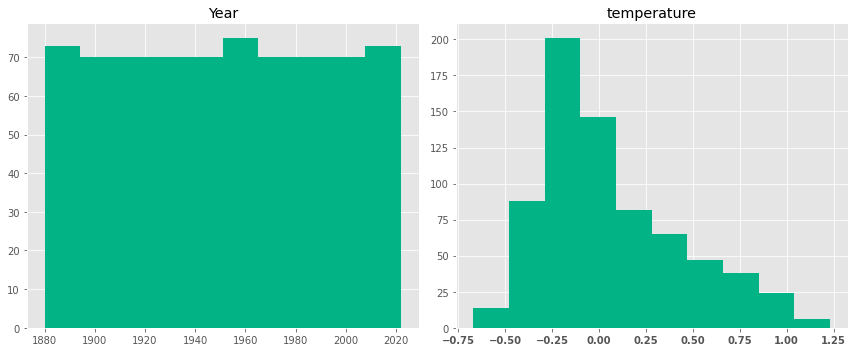

In [ ]:
fig,ax = plt.subplots(figsize=(12,5))
temperatura_sazonal_global.hist(ax=ax,color=['#01B385'])
plt.xticks(fontweight='bold')
fig.tight_layout()

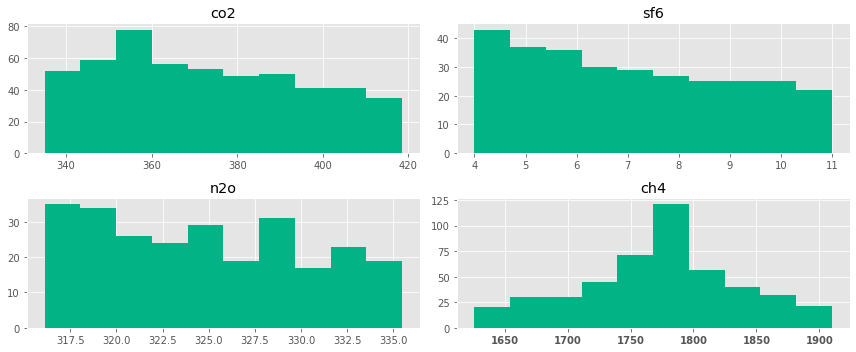

In [ ]:
fig,ax = plt.subplots(figsize=(12,5))
emitions_global_gases.hist(ax=ax,color=['#01B385'])
plt.xticks(fontweight='bold')
fig.tight_layout()

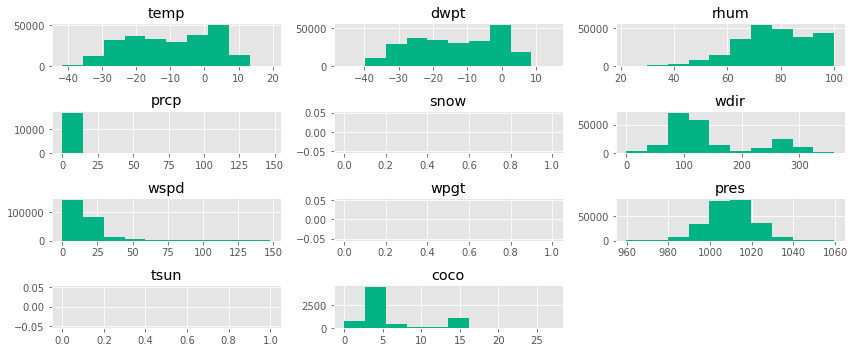

In [ ]:
fig,ax = plt.subplots(figsize=(12,5))
clim_hourly.hist(ax=ax,color=['#01B385'])
plt.xticks(fontweight='bold')
fig.tight_layout()

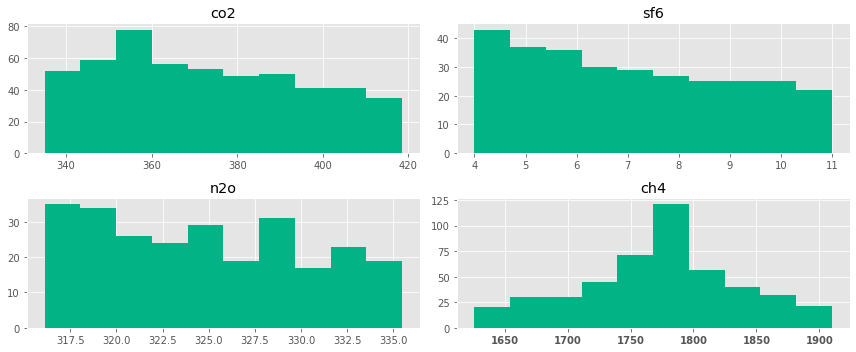

In [ ]:

fig,ax = plt.subplots(figsize=(12,5))
emitions_global_gases.hist(ax=ax,color=['#01B385'])
plt.xticks(fontweight='bold')
fig.tight_layout()

# **Análise exploratória**


---



<strong><h1> Hipóteses</h1></strong>


>> **Groelândia**

*   Houve alteração climatica nos ultimos 37 anos
*   Houve aumento da temperatura média nos ultimos 35 anos
*   Houve aumento da temperatura máxima diária nos ultimos 35 anos
*   Houve aumento da temperatura mínima nos ultimos 35 anos 
*   Houve aumento da velocidade do vento e da pressão nos ultimos 35 anos 
>> **Global**

*   Houve aumento de temperatura no planeta terra nos ultimos 42 anos
*   A produção de gases estufa está associada ao aumento da temperatura da terra



## **Análise climatológica da Groenlândia**


In [ ]:
# FUNÇÃO POLINOMIAL DE TENDENCIA 
def trend(x,y):
  X,Y = np.array(x),np.array(y)
  model = np.poly1d(np.polyfit(X,Y,3))
  return model(X)

In [ ]:
# CRIACAO DE COLUNAS 
clim_hourly['date_number'] = clim_hourly.index.map(mdates.date2num)
clim_daily['date_number']  = clim_daily.index.map(mdates.date2num)
emitions_global_gases['date_number'] = emitions_global_gases.index.map(mdates.date2num)
temperatura_global['date_number'] = temperatura_global.index.map(mdates.date2num)
clim_daily['Year'] = clim_daily.index.year

In [ ]:
# TENDENCIA TEMPORAL 
clim_hourly['trend_temp'] = trend(clim_hourly['date_number'], clim_hourly['temp'])
clim_hourly['trend_wspd'] = trend(clim_hourly['date_number'], clim_hourly['wspd'])
clim_hourly['trend_pres'] = trend(clim_hourly['date_number'], clim_hourly['pres'])
clim_daily['trend_max']   = trend(clim_daily['date_number'], clim_daily['tmax'])
clim_daily['trend_min']   = trend(clim_daily['date_number'], clim_daily['tmin'])
clim_daily['trend_tavg']  = trend(clim_daily['date_number'], clim_daily['tavg'])
temperatura_global['global_trend'] = trend(temperatura_global['date_number'], temperatura_global['temperature'])

In [ ]:
# AUMENTO PERCENTUAL RELATIVO  
percent_au_temp  = ((clim_hourly['trend_temp'][-1]-clim_hourly['trend_temp'][0])*100)/np.abs(clim_hourly['trend_temp'][0])
percent_au_wspd  = ((clim_hourly['trend_wspd'][-1]-clim_hourly['trend_wspd'][0])*100)/np.abs(clim_hourly['trend_wspd'][0])
percent_au_pres  = ((clim_hourly['trend_pres'][-1]-clim_hourly['trend_pres'][0])*100)/np.abs(clim_hourly['trend_pres'][0])
percent_au_max   = ((clim_daily['trend_max'][-1]-clim_daily['trend_max'][0])*100)/np.abs(clim_daily['trend_max'][0])
percent_au_min   = ((clim_daily['trend_min'][-1]-clim_daily['trend_min'][0])*100)/np.abs(clim_daily['trend_min'][0])
percent_au_tavg  = ((clim_daily['trend_tavg'][-1]-clim_daily['trend_tavg'][0])*100)/np.abs(clim_daily['trend_tavg'][0])
percent_au_glob  = ((temperatura_global.loc[:,'global_trend'].values[-1]-temperatura_global.loc[:,'global_trend'].values[0])*100)/np.abs(temperatura_global.loc[:,'global_trend'].values[0])

totaldayle = len(clim_daily)
totalhourly = len(clim_hourly)
totalglobal = len(temperatura_global)

aumentos_percentuais = pd.DataFrame({'var':['Temperatura horária', 'Velocidade do vento','Pressao','Temperatura máxima','Temperatura mínima','Temperatura média'],
                                     'percentual':[percent_au_temp,percent_au_wspd,percent_au_pres,percent_au_max,percent_au_min,percent_au_tavg],
                                     'percentual avg':[percent_au_temp/totalhourly,
                                                    percent_au_wspd/totalhourly,
                                                    percent_au_pres/totalhourly,
                                                    percent_au_max/totaldayle,
                                                    percent_au_min/totaldayle,
                                                    percent_au_tavg/totaldayle,
                                                    # percent_au_glob/totalglobal
                                                    ]
                                    })


**Tendencia dos dados históricos diádirios de temperatura, velocidade do vento e pressão**

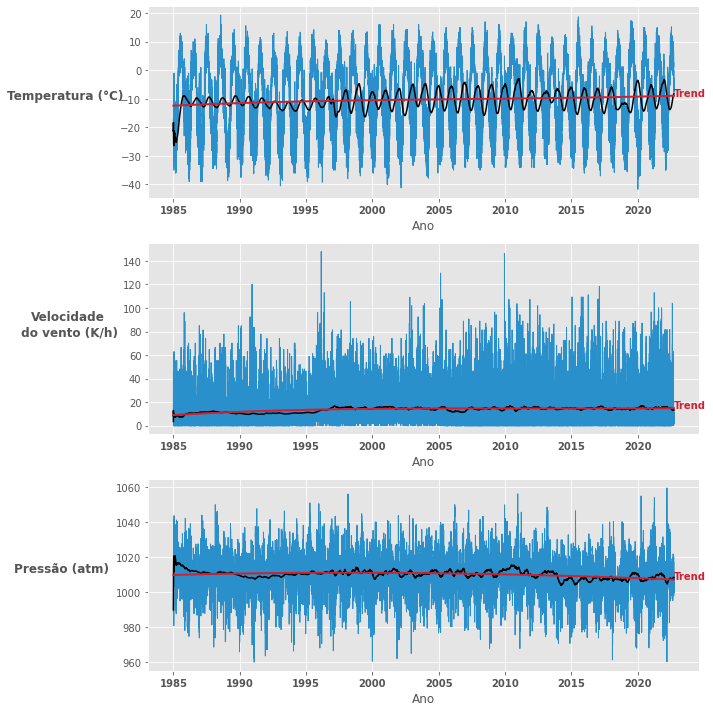

In [ ]:
#@title 

fig,ax = plt.subplots(3,1,figsize=(10,10))

years = list(clim_hourly.index.year.unique())

ax[0].plot(clim_hourly.temp,color = colors[1],linewidth=1)
ax[0].plot(clim_hourly.temp.rolling(24*265,min_periods=1).mean(),color = 'black',linewidth=1.5)
ax[0].plot(clim_hourly['trend_temp'],color = colors[4],linewidth=2)
ax[0].text(clim_hourly.index[-1],clim_hourly['trend_temp'].values[-1],'Trend',color = colors[4],fontweight='bold' )
ax[0].xticks(fontweight='bold')
ax[0].ylabel('Temperatura (°C)',rotation=0,labelpad=55,fontweight='bold')
ax[0].xlabel('Ano')

ax[1].plot(clim_hourly.wspd,color = colors[1],linewidth=1)
ax[1].plot(clim_hourly.wspd.rolling(24*265,min_periods=1).mean(),color = 'black',linewidth=1.5)
ax[1].plot(clim_hourly['trend_wspd'],color = colors[4],linewidth=2)
ax[1].text(clim_hourly.index[-1],clim_hourly['trend_wspd'].values[-1],'Trend',color = colors[4],fontweight='bold' )
ax[1].xlabel('Ano')
ax[1].xticks(fontweight='bold')
ax[1].ylabel('Velocidade\n do vento (K/h)',rotation=0,labelpad=55,fontweight='bold')

ax[2].plot(clim_hourly.pres,color = colors[1],linewidth=1)
ax[2].plot(clim_hourly.pres.rolling(24*265,min_periods=1).mean(),color = 'black',linewidth=1.5)
ax[2].plot(clim_hourly['trend_pres'],color = colors[4],linewidth=2)
ax[2].text(clim_hourly.index[-1],clim_hourly['trend_pres'].values[-1],'Trend',color = colors[4],fontweight='bold' )
ax[2].xlabel('Ano')
ax[2].xticks(fontweight='bold')
ax[2].ylabel('Pressão (atm)',rotation=0,labelpad=55,fontweight='bold')

fig.tight_layout()

**Decomposição dos dados históricos diários de temperatura máxima, temperatura média e temperatura mínima**

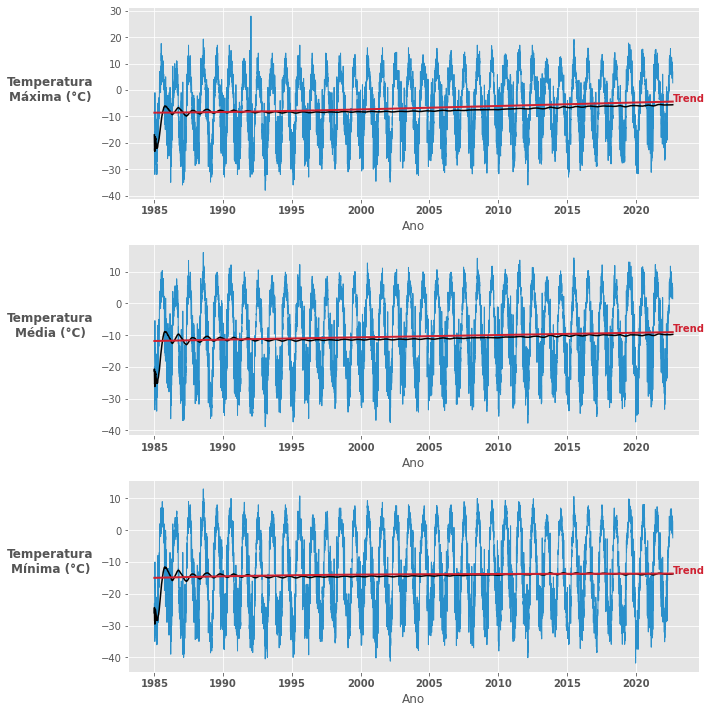

In [ ]:
#@title 

fig,ax = plt.subplots(3,1,figsize=(10,10))
x_tick = list(clim_hourly.index)
ax[0].plot(clim_daily.tmax,color = colors[1],linewidth=1)
ax[0].plot(clim_daily.tmax.rolling(24*265,min_periods=1).mean(),color = 'black',linewidth=1.5)
ax[0].plot(clim_daily['trend_max'],color = colors[4],linewidth=2)
ax[0].text(x_tick[-1],clim_daily['trend_max'].values[-1],'Trend',color = colors[4],fontweight='bold' )
ax[0].xlabel('Ano')
ax[0].xticks(fontweight='bold')
ax[0].ylabel('Temperatura\nMáxima (°C)',rotation=0,labelpad=50,fontweight='bold')

ax[1].plot(clim_daily.tavg,color = colors[1],linewidth=1)
ax[1].plot(clim_daily.tavg.rolling(24*265,min_periods=1).mean(),color = 'black',linewidth=1.5)
ax[1].plot(clim_daily['trend_tavg'],color = colors[4],linewidth=2)
ax[1].text(x_tick[-1],clim_daily['trend_tavg'].values[-1],'Trend',color = colors[4],fontweight='bold' )
ax[1].xlabel('Ano')
ax[1].xticks(fontweight='bold')
ax[1].ylabel('Temperatura\nMédia (°C)',rotation=0,labelpad=50,fontweight='bold')

ax[2].plot(clim_daily.tmin,color = colors[1],linewidth=1)
ax[2].plot(clim_daily.tmin.rolling(24*265,min_periods=1).mean(),color = 'black',linewidth=1.5)
ax[2].plot(clim_daily['trend_min'],color = colors[4],linewidth=2)
ax[2].text(x_tick[-1],clim_daily['trend_min'].values[-1],'Trend',color = colors[4],fontweight='bold' )
ax[2].xlabel('Ano')
ax[2].xticks(fontweight='bold')
ax[2].ylabel('Temperatura\nMínima (°C)',rotation=0,labelpad=50,fontweight='bold')

fig.tight_layout()

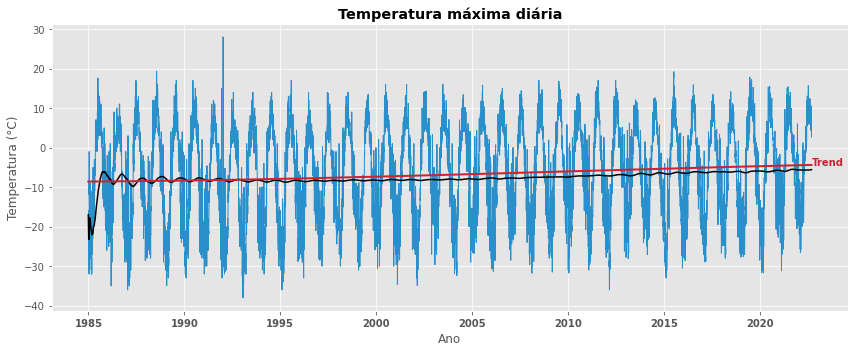

In [ ]:
fig,_ = plt.subplots(figsize=(12,5))
x_tick = list(clim_hourly.index)
plt.plot(clim_daily.tmax,color = colors[1],linewidth=1)
plt.plot(clim_daily.tmax.rolling(24*265,min_periods=1).mean(),color = 'black',linewidth=1.5)
plt.plot(clim_daily['trend_max'],color = colors[4],linewidth=2)
plt.text(x_tick[-1],clim_daily['trend_max'].values[-1],'Trend',color = colors[4],fontweight='bold' )
plt.xticks(fontweight='bold')
plt.title('Temperatura máxima diária',fontweight='bold')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Ano')

fig.tight_layout()

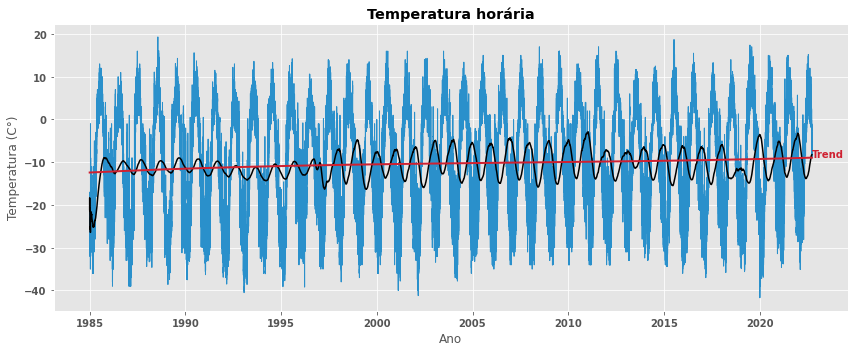

In [ ]:
fig,_ = plt.subplots(figsize=(12,5))
x_tick = list(clim_hourly.index)
plt.plot(clim_hourly.temp,color = colors[1],linewidth=1)
plt.plot(clim_hourly.temp.rolling(24*265,min_periods=1).mean(),color ='black' ,linewidth=1.5)
plt.plot(clim_hourly['trend_temp'],color = colors[4],linewidth=2)
plt.text(clim_hourly.index[-1],clim_hourly['trend_temp'].values[-1],'Trend',color =colors[4] ,fontweight='bold' )
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.title('Temperatura horária',fontweight='bold')

plt.ylabel('Temperatura (C°)')
plt.xlabel('Ano')

fig.tight_layout()

> **Aumento percentual relativo**

Em 35 anos houve um aumento relevante de 27% na tendência da temperatura horária e 48% na temperatura máxima diária. Na pressão podemos observar uma diminuição aproximada de -26% o que aumenta a temperatura de fusão do gelo, tornando assim mais fácil o degelo.



In [ ]:
display(aumentos_percentuais.style.background_gradient(cmap=cm))

,var,percentual,percentual avg
0,Temperatura horária,28.017833,0.000113
1,Velocidade do vento,64.895752,0.000262
2,Pressao,-0.261066,-0.000001
3,Temperatura máxima,48.926398,0.004025
4,Temperatura mínima,8.930347,0.000735
5,Temperatura média,23.625361,0.001943


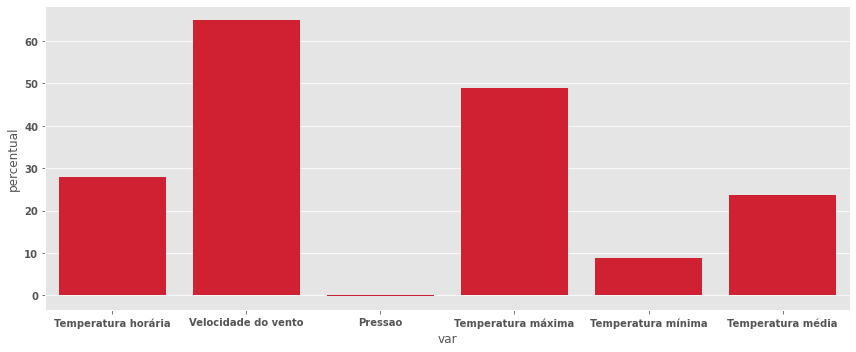

In [ ]:
plt.subplots(figsize=(12,5))
sns.barplot(data=aumentos_percentuais,x='var',y='percentual',saturation=100,color=colors[4])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# plt.title
plt.tight_layout()

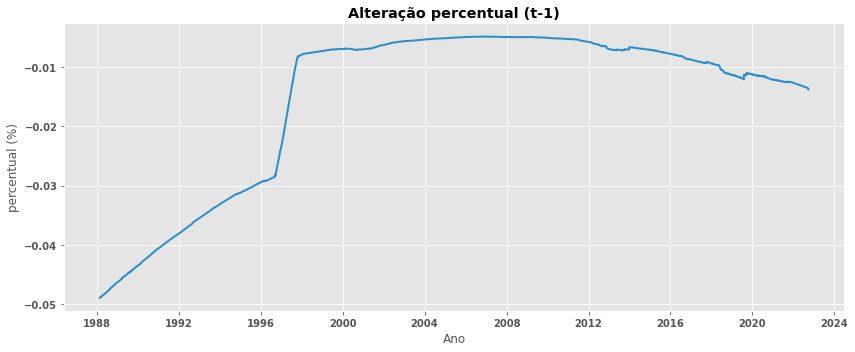

In [ ]:
fig,_ = plt.subplots(figsize=(12,5))
plt.plot(clim_hourly['trend_temp'].pct_change(365*24),color = colors[1],linewidth=2)

plt.title('Alteração percentual (t-1)',fontweight='bold')

plt.ylabel('percentual (%)')
plt.xlabel('Ano')
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
fig.tight_layout()

## **Analise climatologica global**

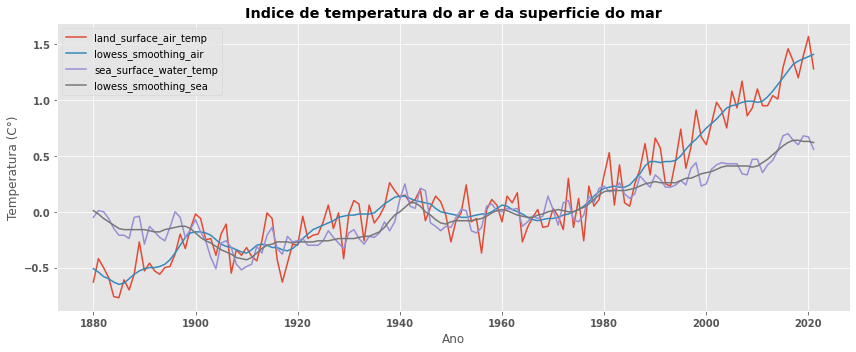

In [ ]:
fig,ax = plt.subplots(figsize=(12,5))
air_ocean.set_index("year").plot(ax=ax)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.xlabel('Ano')
plt.ylabel('Temperatura (C°)')

plt.title('Indice de temperatura do ar e da superficie do mar',fontweight='bold')

fig.tight_layout()

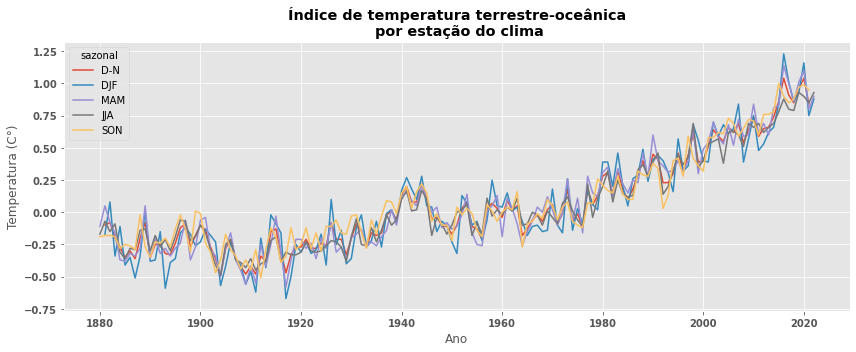

In [ ]:
fig,ax = plt.subplots(figsize=(12,5))
x_tick = list(clim_hourly.index)
sns.lineplot(data=temperatura_sazonal_global,y='temperature',x='Year',hue='sazonal')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.ylabel('Temperatura (C°)')
plt.xlabel('Ano')
plt.title('Índice de temperatura terrestre-oceânica\n por estação do clima',fontweight='bold')

fig.tight_layout()

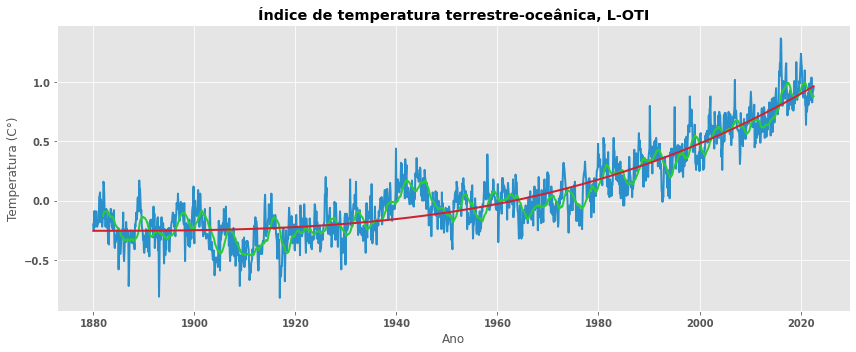

In [ ]:


fig,ax = plt.subplots(figsize=(12,5))
x_tick = list(clim_hourly.index)
ax.plot(temperatura_global.temperature,color = colors[1],linewidth=2)
ax.plot(temperatura_global.temperature.rolling(12*2).mean(),color = colors[0],linewidth=2)
ax.plot(temperatura_global.global_trend,color = colors[4],linewidth=2)
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.title('Índice de temperatura terrestre-oceânica, L-OTI',fontweight='bold')

plt.ylabel('Temperatura (C°)')
plt.xlabel('Ano')
fig.tight_layout()

Existe correlação entre a emissão de gases como CO2, SF6, N20 e CH4 e o aumento de temperatura global

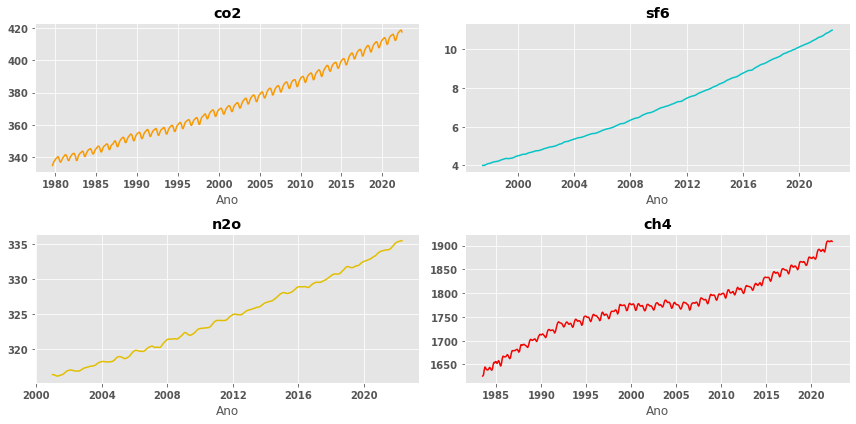

In [ ]:
fig,_ = plt.subplots(2,2,figsize=(12,6))
x_tick = list(clim_hourly.index)
colors_emissions= ['#F99901','#06C3C6','#E1BF00','#F10502']
for i,c in zip(range(0,4),colors_emissions):
  plt.subplot(2,2,i+1)
  plt.plot(emitions_global_gases.iloc[:,i],linewidth=1.5,color=c)
  plt.title(emitions_global_gases.columns[i],fontweight='bold')
  plt.xticks(fontweight='bold')
  plt.yticks(fontweight='bold')
  plt.xlabel('Ano')


fig.tight_layout()

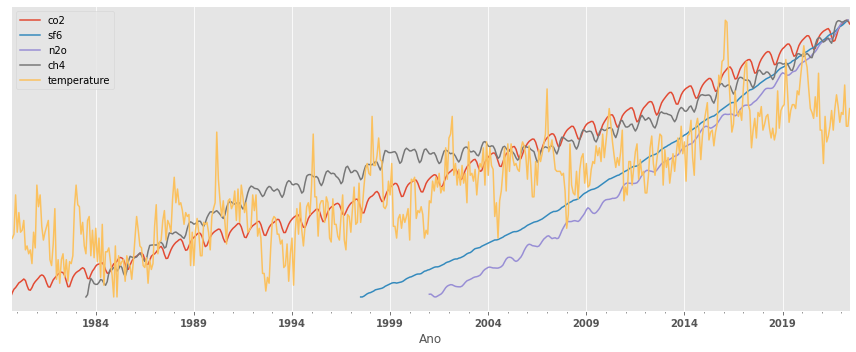

In [ ]:
scaler = MinMaxScaler()
emitions = emitions_global_gases.join(temperatura_global[['temperature']])
emitions = emitions[['co2','sf6','n2o','ch4','temperature']]
emitions[['co2','sf6','n2o','ch4','temperature']] = scaler.fit_transform(emitions)

fig,ax = plt.subplots(figsize=(12,5))
emitions.plot(ax=ax)
plt.xticks(fontweight='bold')
plt.xlabel('Ano')

plt.yticks([])
fig.tight_layout()

O teste anova obteve um pvalue abaixo de 5% descartando a hipótese nula em todas as comparações entre gases e temperatura.

In [ ]:
emitions_temp = emitions_global_gases.join(temperatura_global[['temperature']])
# Conduct the one-way ANOVA
for i in ['co2','sf6','n2o','ch4']:
    data = emitions_temp[['temperature',i]].dropna()
    test = f_oneway(data['temperature'],data[i])
    print(f'{i}:\n  pvalue = {test.pvalue:.3f}\n  fvalue = {test.statistic:.1f}')

co2:
  pvalue = 0.000
  fvalue = 135353.5
sf6:
  pvalue = 0.000
  fvalue = 2905.0
n2o:
  pvalue = 0.000
  fvalue = 846155.8
ch4:
  pvalue = 0.000
  fvalue = 372183.2


No teste de correlação de pearson obteve um percentual acima de 70% para todos os gases em relação a temperatura global.

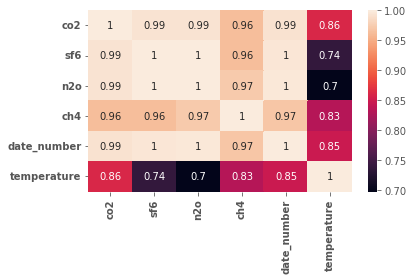

In [ ]:
fig,_ = plt.subplots(figsize=(6,4))
sns.heatmap(emitions_temp.corr(),annot=True)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
fig.tight_layout()

Já nas variáveis sazonais não encontramos significancia suficiente para a hipótese de correlação entre a sazonalidade e a temperatura global, não podendo descartar nenhuma hipótese nula em nenhuma das variáveis sazonais de mês, semestre, dia da semana e semana do ano.

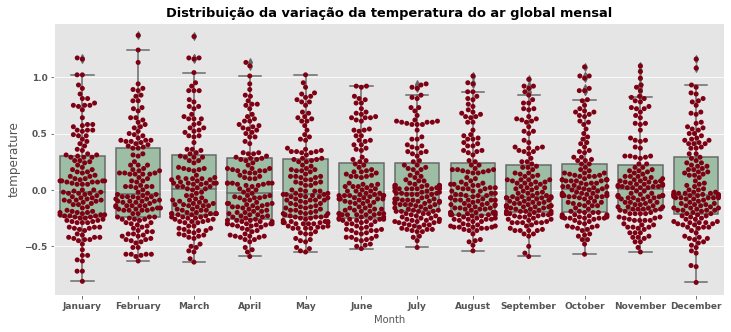

In [ ]:
plt.subplots(figsize=[12,5])
ax = sns.boxplot(x=temperatura_global.index.month, y=temperatura_global.temperature, color='#99c2a2')
ax = sns.swarmplot(x=temperatura_global.index.month, y=temperatura_global.temperature, color='#7d0013')

plt.xticks(list(range(0,12)),temperatura_global.index.month_name().unique(),fontweight='bold',fontsize=9)
plt.yticks(fontweight='bold',fontsize=9)
plt.title('Distribuição da variação da temperatura do ar global mensal',fontweight='bold',fontsize=13)
plt.xlabel('Month',fontsize=10)
plt.show(ax)

In [ ]:
# ANOVA TEST
df_anova = temperatura_global[['temperature']].copy()
df_anova['month'] = temperatura_global.index.month
df_anova['quarter'] = temperatura_global.index.quarter
df_anova['weekofyear'] = temperatura_global.index.weekofyear
df_anova['day_of_week'] = temperatura_global.index.day_of_week

# Ordinary Least Squares (OLS) model
model = ols('temperature ~ C(month) + C(day_of_week) + C(weekofyear) + C(quarter)', data = df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table.style.background_gradient(cmap=cm))

,sum_sq,df,F,PR(>F)
C(month),1.575503,11.000000,0.971496,0.378729
C(day_of_week),0.049108,6.000000,0.055515,0.999318
C(weekofyear),3.294233,23.000000,0.971496,0.378729
C(quarter),0.429683,3.000000,0.971496,0.378729
Residual,247.977047,1682.000000,nan,nan


Também não há evidência significante no teste de pearson.

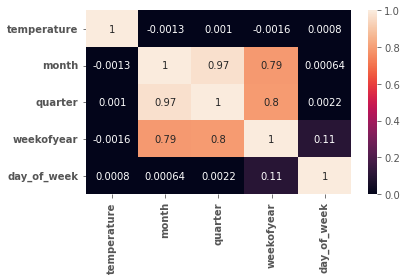

In [ ]:

fig,_ = plt.subplots(figsize=(6,4))
sns.heatmap(df_anova.corr(),annot=True)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
fig.tight_layout()

# **Previsão**

##**SARIMAX**

> **Decomposição sazonal**

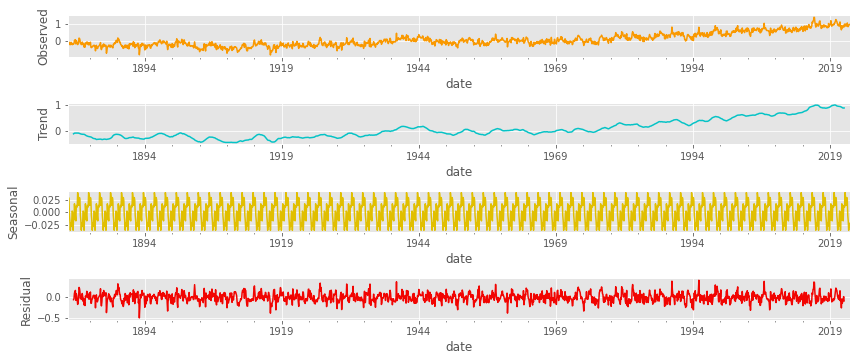

In [ ]:
# salvar os componentes da *time series* na variável results
result = seasonal_decompose(temperatura_global.temperature,period=24)

# plotar componentes
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,5))

c = ['#F99901','#06C3C6','#E1BF00','#F10502']
result.observed.plot(ax=ax1,ylabel ='Observed',color=c[0])
result.trend.plot(ax=ax2,ylabel='Trend',color=c[1])
result.seasonal.plot(ax=ax3,ylabel='Seasonal',color=c[2])
result.resid.plot(ax=ax4,ylabel='Residual',color=c[3])
plt.tight_layout()

Janela temporal: 24 months


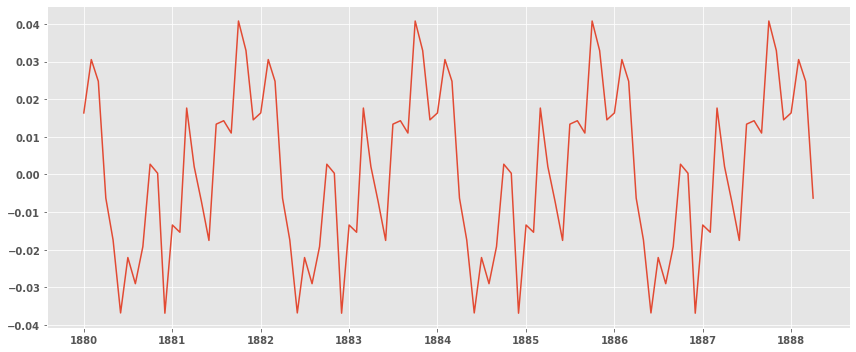

In [ ]:
fig, ax = plt.subplots( figsize=(12,5))
plt.plot(result.seasonal[:100])
print(f'Janela temporal: {len(result.seasonal.unique())} months')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()

In [ ]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    kpss_output = round(kpss_output,5)
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

def dkf_test(timeseries):
    print("Results of ADFULLER Test:")
    adftest = adfuller(timeseries, regression="c")
    adf_output = pd.Series(
        adftest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    adf_output = round(adf_output,5)
    for key, value in adftest[4].items():
        adf_output["Critical Value (%s)" % key] = value
    print(adf_output)

> **Estacionariedade**

A hipótese nula não pode ser rejeitada de acordo com o teste de Dickey-Fuller, portanto á série não é estacionária.

In [ ]:
dkf_test(temperatura_global.temperature)

Results of ADFULLER Test:
Test Statistic          -0.529490
p-value                  0.886130
Lags Used               24.000000
Critical Value (1%)     -3.434232
Critical Value (5%)     -2.863255
Critical Value (10%)    -2.567683
dtype: float64


In [ ]:
kpss_test(temperatura_global.temperature)


Results of KPSS Test:
Test Statistic            5.17828
p-value                   0.01000
Lags Used                26.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


Aplicando diferenciação

In [ ]:
dkf_test(temperatura_global.temperature.diff(1).dropna())

Results of ADFULLER Test:
Test Statistic         -12.386040
p-value                  0.000000
Lags Used               23.000000
Critical Value (1%)     -3.434232
Critical Value (5%)     -2.863255
Critical Value (10%)    -2.567683
dtype: float64


In [ ]:
kpss_test(temperatura_global.temperature.diff(1).dropna())

Results of KPSS Test:
Test Statistic            0.13021
p-value                   0.10000
Lags Used                71.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


> **Analisando a autocorrelação** 

P - grau de Diferenciação de correlação parcial

D - grau de Diferenciação de autocorrelação

Q - quatidade de defasagens

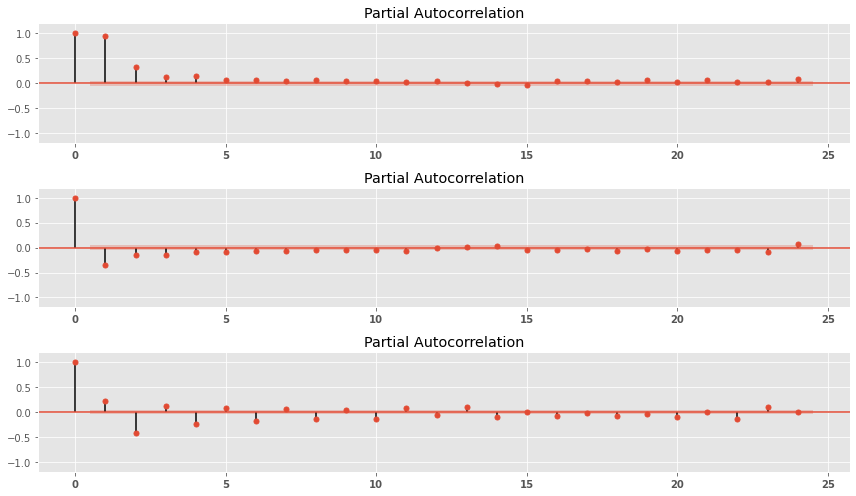

In [ ]:
fig,_ = plt.subplots(3,1,figsize=(12,7))
ax1 = plt.subplot(3,1,1)
plot_pacf(temperatura_global.temperature, ax=ax1,lags =24)
plt.ylim([-1.2,1.2])
plt.xticks(fontweight='bold')

ax2 = plt.subplot(3,1,2)
plot_pacf(temperatura_global.temperature.diff(1).dropna(), ax=ax2,lags =24)
plt.ylim([-1.2,1.2])
plt.xticks(fontweight='bold')

ax3 = plt.subplot(3,1,3)
plot_pacf(temperatura_global.temperature.diff(2).dropna(), ax=ax3,lags =24)
plt.ylim([-1.2,1.2])
plt.xticks(fontweight='bold')
fig.tight_layout()

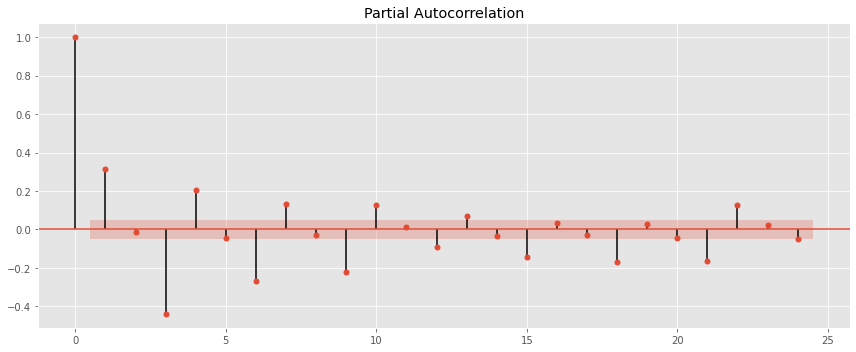

In [ ]:
fig,ax = plt.subplots(figsize=(12,5))
plot_pacf(temperatura_global.temperature.diff(3).dropna(), ax=ax,lags =24)
fig.tight_layout()

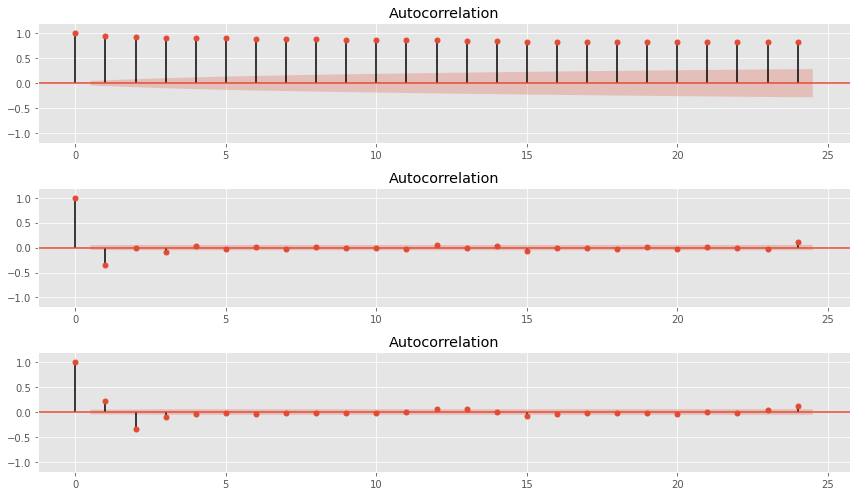

In [ ]:
# AUTOCORRRELATION
fig,_ = plt.subplots(3,1,figsize=(12,7))
ax1 = plt.subplot(3,1,1)
sm.graphics.tsa.plot_acf(temperatura_global.temperature, ax=ax1,lags =24)
plt.ylim([-1.2,1.2])

ax2 = plt.subplot(3,1,2)
sm.graphics.tsa.plot_acf(temperatura_global.temperature.diff(1).dropna(), ax=ax2,lags =24)
plt.ylim([-1.2,1.2])

ax3 = plt.subplot(3,1,3)
sm.graphics.tsa.plot_acf(temperatura_global.temperature.diff(2).dropna(), ax=ax3,lags =24)
plt.ylim([-1.2,1.2])

fig.tight_layout()

In [ ]:
def grid_sarima(train,p_values,d_values,q_values,sazonality,verbose=False):

  best_aic = float('inf')
  best_bic = float('inf')
  best_order = (None,None,None)
  best_sazonal = (None,None,None)
  best_model =None
  order_params = list(product(p_values,d_values,q_values))
  seazonal_order_params = list(product(p_values,d_values,q_values,[sazonality]))

  for order in order_params:
      for seazonal in seazonal_order_params:
      
        try:
          mod = sm.tsa.statespace.SARIMAX(train,
                                order=order,
                                seasonal_order=seazonal,
                                trend='t',
                                enforce_stationarity=False,
                                enforce_invertibility=False)
          
          results = mod.fit()

          AIC = results.aic
          BIC = results.bic

          if verbose:
            print(f"SARIMAX({order[0]},{order[1]},{order[2]})({seazonal[0]},{seazonal[1]},{seazonal[2]},{sazonality}) - AIC:{AIC}  BIC:{BIC}")

          if AIC < best_aic:
            best_aic = AIC
            best_bic = BIC
            best_order = order
            best_sazonal = seazonal
            best_model = results

            print(f"BEST SARIMAX({best_order[0]},{best_order[1]},{best_order[2]})({best_sazonal[0]},{best_sazonal[1]},{best_sazonal[2]},{sazonality}) - AIC:{best_aic}  BIC:{best_bic}")
        except:
          print('ERROR')
          continue
  print(f"\n\n BEST PARAMS SARIMAX({best_order[0]},{best_order[1]},{best_order[2]})({best_sazonal[0]},{best_sazonal[1]},{best_sazonal[2]},{sazonality}) - AIC:{best_aic}  BIC:{best_bic}")
  return best_model

In [ ]:
%%time
# GRID SEARCH
p_values = list(range(2,3))
d_values = list([1])
q_values = list(range(1,3))

sarima = grid_sarima(temperatura_global.temperature,p_values,d_values,q_values,24,verbose=True)

print(sarima.summary().tables[1])

SARIMAX(2,1,1)(2,1,1,24) - AIC:-2201.570744040622  BIC:-2158.365779421653
BEST SARIMAX(2,1,1)(2,1,1,24) - AIC:-2201.570744040622  BIC:-2158.365779421653
SARIMAX(2,1,1)(2,1,2,24) - AIC:-2274.949525503842  BIC:-2226.3439403075017
BEST SARIMAX(2,1,1)(2,1,2,24) - AIC:-2274.949525503842  BIC:-2226.3439403075017
SARIMAX(2,1,2)(2,1,1,24) - AIC:-2206.8223019930697  BIC:-2158.2167167967295
SARIMAX(2,1,2)(2,1,2,24) - AIC:-2291.6061780716464  BIC:-2237.6060829000194
BEST SARIMAX(2,1,2)(2,1,2,24) - AIC:-2291.6061780716464  BIC:-2237.6060829000194


 BEST PARAMS SARIMAX(2,1,2)(2,1,2,24) - AIC:-2291.6061780716464  BIC:-2237.6060829000194
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift      -4.022e-08   1.32e-06     -0.030      0.976   -2.63e-06    2.55e-06
ar.L1         -0.5799      0.226     -2.567      0.010      -1.023      -0.137
ar.L2          0.2194      0.073      3.008      0.0

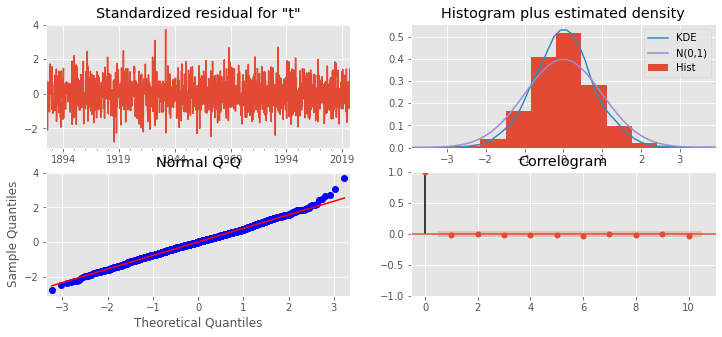

In [ ]:
sarima.plot_diagnostics(figsize=(12,5))
plt.show()

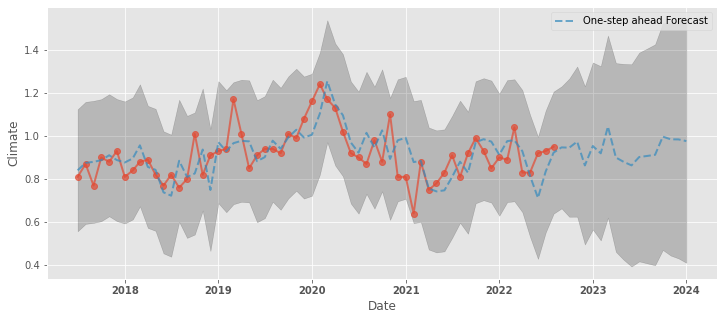

In [ ]:
pred = sarima.get_prediction(start=pd.to_datetime('2017-07-01 00:00:00'),end=pd.to_datetime('2024-01-01 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(temperatura_global[1650:].temperature, alpha=.7,linewidth=2,marker='o')
ax.plot(pred.predicted_mean,linestyle="--", label='One-step ahead Forecast', alpha=.7,linewidth=2)
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Climate')
plt.xticks(fontweight='bold')
plt.legend()
plt.show()

##**ExponentialSmoothing**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing

scaler = MinMaxScaler((1, 2))
train = temperatura_global[['temperature']]
train['temperature'] = scaler.fit_transform(train)

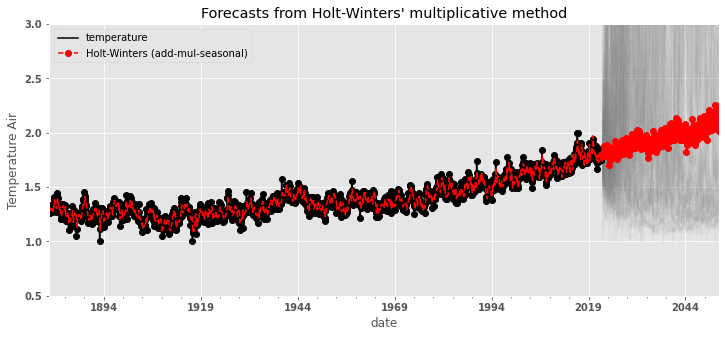

,Multiplicative
alpha,4.788109e-01
beta,1.139296e-17
phi,NaN
gamma,0.000000e+00
l_0,1.973212e-01
b_0,1.093445e-04
SSE,4.162532e+00


In [ ]:
ets = ExponentialSmoothing(
    train,
    seasonal_periods=12*10,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

simulations = ets.simulate(12*30, repetitions=100, error="mul", random_errors="bootstrap")

results = pd.DataFrame(index=["alpha", "beta", "phi", "gamma", "l_0", "b_0", "SSE"])
params = ["smoothing_level","smoothing_trend","damping_trend","smoothing_seasonal","initial_level","initial_trend",]
results["Multiplicative"] = [ets.params[p] for p in params] + [ets.sse]

fig, ax = plt.subplots(figsize=(12,5))
simulations.plot(ax=ax, style="-", alpha=0.05, color="grey", legend=False)
train.plot(marker="o",color="black",title="Forecasts from Holt-Winters' multiplicative method",ax = ax)
ax.set_ylabel("Temperature Air")
ax.set_xlabel("Year")
ets.fittedvalues.plot(ax=ax, style="--", color="red")

ets.forecast(12*30).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)
plt.ylim([0.5,3])

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()
display(results)

#**Conclusão**


---



<h3><strong>Groelândia</strong></h3>

>   ***Houve aumento da temperatura média nos ultimos 35 anos***

Houve um aumento 23.625361% na tendência da temperatura média diária.


>   ***Houve aumento da temperatura máxima diária nos ultimos 35 anos***

Houve uma taxa de crescimento médio na tendência de temperatura máxima diara de 0.004025% e um aumento total  48.926398% do ano de 1985 a 2022, indicando uma poss´vel alteração climática no país.

>   ***Houve aumento da temperatura mínima nos ultimos 35 anos***

Houve uma taxa de crescimento médio na tendência de temperatura mínima diara de 0.000735% e um aumento total  8.930347% do ano de 1985 a 2022, indicando uma poss´vel alteração climática no país.

>   ***Houve aumento da velocidade do vento e da pressão nos ultimos 35 anos***

Houve um decrescimo médio de -0.000001%	e total de -0.261066% do ano de 1985 a 2022.

<h3><strong>Global</strong></h3>


>   ***Houve aumento de temperatura no planeta terra nos ultimos 42 anos***

Houve um aumento total de 479.46% na tendência do ano de 1980 a 2022.


>   ***A produção de gases estufa está associada ao aumento da temperatura da 
terra***

Ao que tudo indica existe uma corte correlação estatística entre o aumento da temperatura global com a emissão de gases poluentes na atmosfera terrestre.

